In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import re
import random
import numpy as np

In [2]:
# Path to the dataset
data_dir = '../data/chest_xray/train'

# Function to count files in a directory
def count_files(directory):
    if not os.path.exists(directory):
        return 0
    # Only count files, not subdirectories, and exclude hidden files
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and not f.startswith('.')])

# Count files in each subfolder
normal_dir = os.path.join(data_dir, 'NORMAL')
pneumonia_dir = os.path.join(data_dir, 'PNEUMONIA')

normal_count = count_files(normal_dir)
pneumonia_count = count_files(pneumonia_dir)

print(f"Number of NORMAL X-ray images: {normal_count} ({normal_count/(normal_count+pneumonia_count)*100:.1f}%)")
print(f"Number of PNEUMONIA X-ray images: {pneumonia_count} ({pneumonia_count/(normal_count+pneumonia_count)*100:.1f}%)")
print(f"Total number of X-ray images: {normal_count + pneumonia_count}")

Number of NORMAL X-ray images: 1341 (25.7%)
Number of PNEUMONIA X-ray images: 3875 (74.3%)
Total number of X-ray images: 5216


In [3]:
# Function to identify pneumonia type from filename
def analyze_pneumonia_types(directory):
    if not os.path.exists(directory):
        return {"bacteria": 0, "virus": 0, "unknown": 0}, []
    
    # Count patterns
    bacteria_count = 0
    virus_count = 0
    unknown_count = 0
    
    # Store some example filenames
    bacteria_examples = []
    virus_examples = []
    unknown_examples = []
    
    # Get all filenames
    filenames = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and not f.startswith('.')]
    
    # Regular expressions to match the patterns
    bacteria_pattern = re.compile(r'bacteria', re.IGNORECASE)
    virus_pattern = re.compile(r'virus', re.IGNORECASE)
    
    # Analyze each filename
    for filename in filenames:
        if bacteria_pattern.search(filename):
            bacteria_count += 1
        elif virus_pattern.search(filename):
            virus_count += 1
        else:
            unknown_count += 1
    
    # Combine counts and examples
    counts = {
        "bacteria": bacteria_count,
        "virus": virus_count,
        "unknown": unknown_count
    }
    
    return counts

# Analyze pneumonia types
pneumonia_counts = analyze_pneumonia_types(pneumonia_dir)

print("Pneumonia Type Distribution:")
print(f"Bacterial pneumonia images: {pneumonia_counts['bacteria']} ({pneumonia_counts['bacteria']/pneumonia_count*100:.1f}%)")
print(f"Viral pneumonia images: {pneumonia_counts['virus']} ({pneumonia_counts['virus']/pneumonia_count*100:.1f}%)")
if pneumonia_counts['unknown'] > 0:
    print(f"Unknown pneumonia type: {pneumonia_counts['unknown']} ({pneumonia_counts['unknown']/pneumonia_count*100:.1f}%)")

Pneumonia Type Distribution:
Bacterial pneumonia images: 2530 (65.3%)
Viral pneumonia images: 1345 (34.7%)


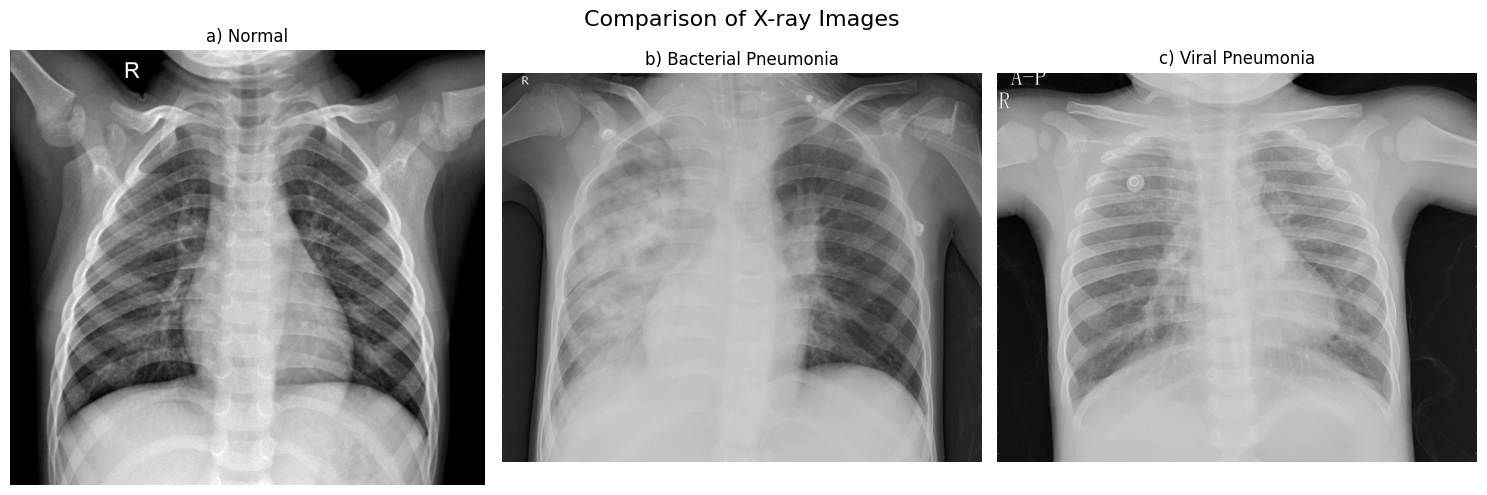

In [4]:
# Function to load and display an image
def load_and_plot_image(ax, image_path, title):
    try:
        # Open the image with PIL
        img = Image.open(image_path)
        
        # Convert to grayscale if it's not already
        if img.mode != 'L':  # 'L' means grayscale
            img = img.convert('L')
        
        # Display the image
        ax.imshow(np.array(img), cmap='gray')
        ax.set_title(title)
        ax.axis('off')
        
        return True
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        ax.text(0.5, 0.5, f"Error loading image", ha='center', va='center')
        ax.axis('off')
        return False

# Get random image paths
normal_image_path = data_dir + '/NORMAL/IM-0135-0001.jpeg'
bacteria_image_path = data_dir + '/PNEUMONIA/person35_bacteria_181.jpeg'
virus_image_path =  data_dir + '/PNEUMONIA/person154_virus_306.jpeg'

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Load and display images
load_and_plot_image(axes[0], normal_image_path, 'a) Normal')
load_and_plot_image(axes[1], bacteria_image_path, 'b) Bacterial Pneumonia')
load_and_plot_image(axes[2], virus_image_path, 'c) Viral Pneumonia')

plt.suptitle('Comparison of X-ray Images', fontsize=16)
plt.tight_layout()
plt.savefig('figs/xray_type_comparison.png')
plt.show()


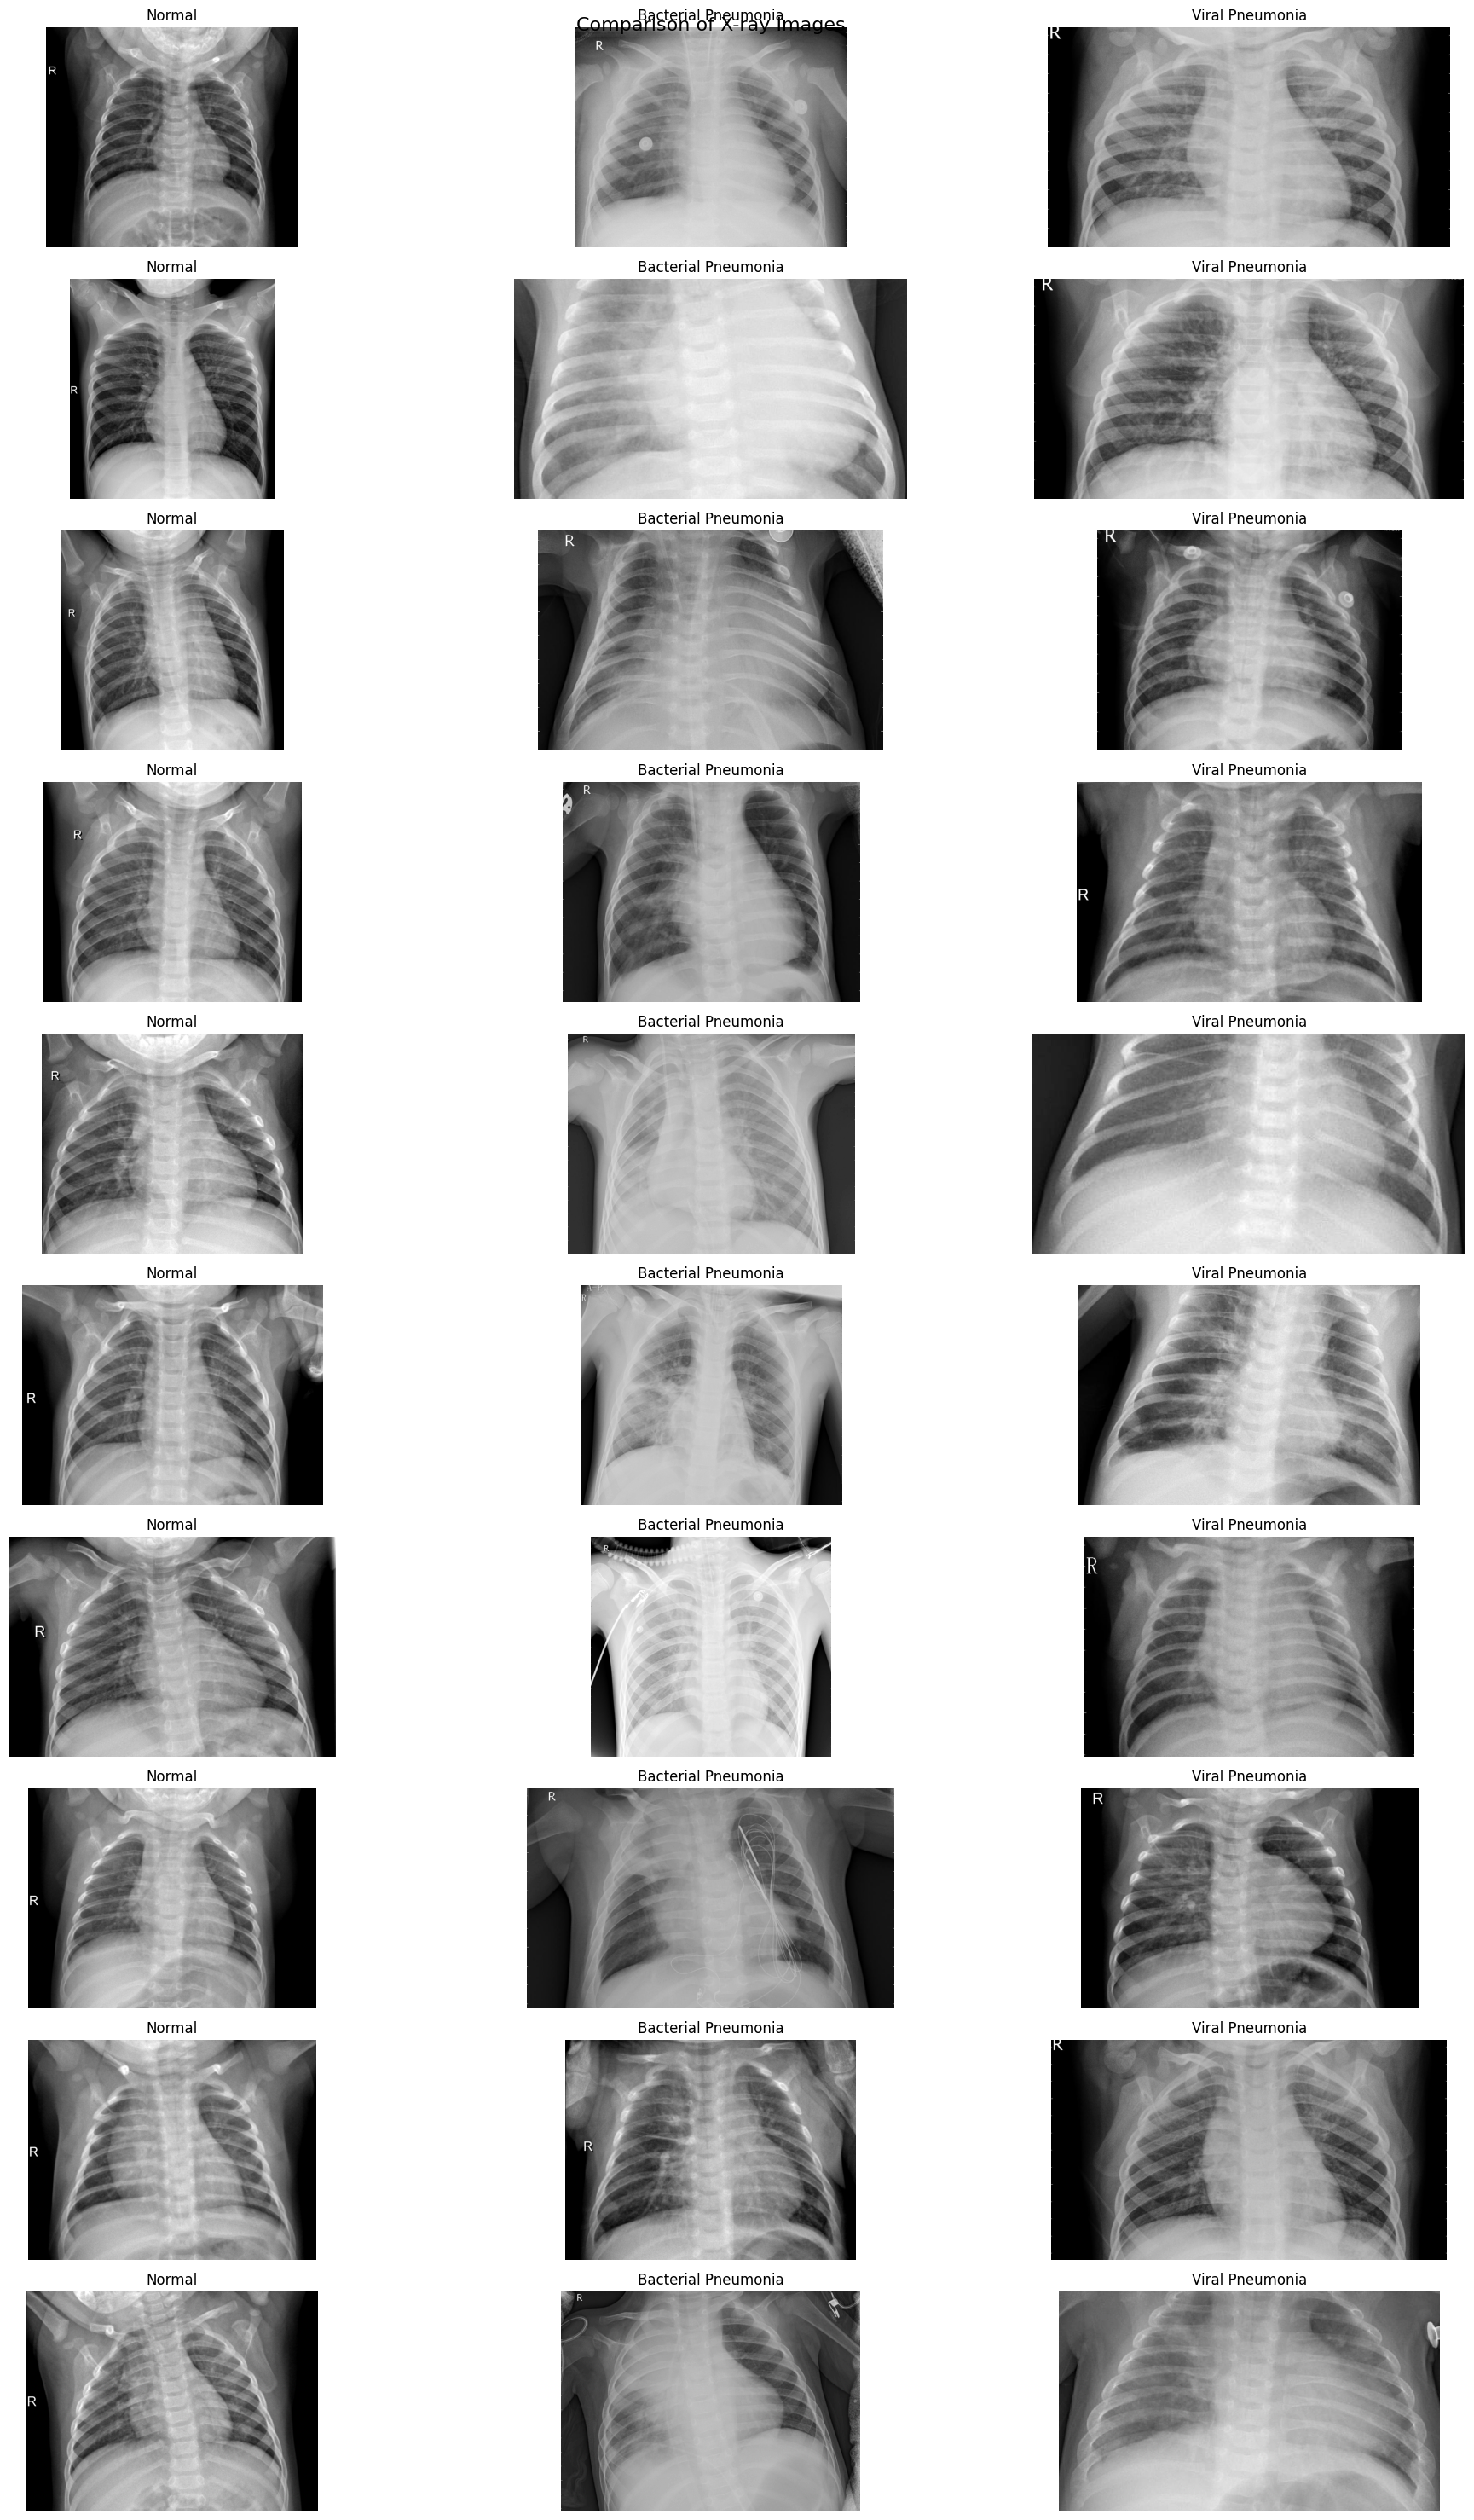

In [5]:
# Function to get a random image from a directory
def get_random_image_path(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and not f.startswith('.')]
    if not files:
        return None
    return os.path.join(directory, random.choice(files))

# Function to get a random image of specific pneumonia type
def get_random_pneumonia_image(directory, pneumonia_type):
    # Get all files
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and not f.startswith('.')]
    
    # Filter by pneumonia type
    if pneumonia_type.lower() == 'bacteria':
        pattern = re.compile(r'bacteria', re.IGNORECASE)
    elif pneumonia_type.lower() == 'virus':
        pattern = re.compile(r'virus', re.IGNORECASE)
    else:
        return None
    
    # Find matching files
    matching_files = [f for f in files if pattern.search(f)]
    
    if not matching_files:
        return None
    
    # Select a random file
    random_file = random.choice(matching_files)
    return os.path.join(directory, random_file)

fig = plt.figure(figsize=(20, 30))
for i in range(10):
    normal_image_path = get_random_image_path(normal_dir)
    bacteria_image_path = get_random_pneumonia_image(pneumonia_dir, 'bacteria')
    virus_image_path = get_random_pneumonia_image(pneumonia_dir, 'virus')

    # Load and display images
    ax = fig.add_subplot(10, 3, 1+i*3)
    load_and_plot_image(ax, normal_image_path, 'Normal')
    ax = fig.add_subplot(10, 3, 2+i*3)
    load_and_plot_image(ax, bacteria_image_path, 'Bacterial Pneumonia')
    ax = fig.add_subplot(10, 3, 3+i*3)
    load_and_plot_image(ax, virus_image_path, 'Viral Pneumonia')

plt.suptitle('Comparison of X-ray Images', fontsize=16)
plt.tight_layout()
plt.show()

# Describe visual differences
Visual Differences Between the Images:
1. Normal X-ray:
- Clear lung fields with uniform darkness
- Well-defined heart borders and blood vessels
- No significant opacities in lung fields
2. Bacterial Pneumonia X-ray:
- Dense, localized white areas
- Often more affeting one lung
- Well-defined borders of the opacity
3. Viral Pneumonia X-ray:
- More diffuse, interstitial pattern
- Often bilateral (affecting both lungs)
- Less dense opacities compared to bacterial pneumonia
- More spread out throughout the lungs